<a href="https://colab.research.google.com/github/riyoalfath/Text-Based-Model-Sentiment-Analysis/blob/main/BiLSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import dataset dari gdrive

from google.colab import drive

!gdown https://drive.google.com/uc?id=1xzAV3SYVDSsR-qwrH9LIhK0GOmliwDiM # location file gdrive
!unzip /content/archive.zip # unpack zip

print('Data source import complete.')

Downloading...
From: https://drive.google.com/uc?id=1xzAV3SYVDSsR-qwrH9LIhK0GOmliwDiM
To: /content/archive.zip
100% 4.60M/4.60M [00:00<00:00, 24.8MB/s]
Archive:  /content/archive.zip
  inflating: Corona_NLP_test.csv     
  inflating: Corona_NLP_train.csv    
Data source import complete.


In [ ]:
!pip install tensorflow-addons
!pip install typeguard>=4.0.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 14.1 MB/s eta 0:00:00
  Attempting uninstall: typeguard
    Found existing installation: typeguard 4.4.2
    Uninstalling typeguard-4.4.2:
      Successfully uninstalled typeguard-4.4.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
inflect 7.5.0 requires typeguard>=4.0.1, but you have typeguard 2.13.3 which is incompatible.


In [ ]:
import numpy as np
import tensorflow as tf
import random
import os

SEED = 42
np.random.seed(SEED)
random.seed(SEED)
tf.random.set_seed(SEED)
os.environ['PYTHONHASHSEED'] = str(SEED)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding_2 (Embedding)              │ (None, 50, 100)             │       3,371,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_2 (Bidirectional)      │ (None, 512)                 │         731,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 100)                 │          51,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 3)                   │             303 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,154,339 (15.85 MB)

 Trainable params: 4,154,339 (15.85 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1029/1029 ━━━━━━━━━━━━━━━━━━━━ 19s 16ms/step - accuracy: 0.5544 - loss: 1.1003 - val_accuracy: 0.8525 - val_loss: 0.4693 - learning_rate: 0.0010
Epoch 2/10
1029/1029 ━━━━━━━━━━━━━━━━━━━━ 19s 14ms/step - accuracy: 0.8734 - loss: 0.4098 - val_accuracy: 0.8705 - val_loss: 0.4348 - learning_rate: 0.0010
Epoch 3/10
1029/1029 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - accuracy: 0.9150 - loss: 0.2969 - val_accuracy: 0.8641 - val_loss: 0.4394 - learning_rate: 0.0010
Epoch 4/10
1026/1029 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9370 - loss: 0.2249
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
1029/1029 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.9370 - loss: 0.2248 - val_accuracy: 0.8556 - val_loss: 0.5129 - learning_rate: 0.0010
Epoch 5/10
1029/1029 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - accuracy: 0.9524 - loss: 0.1682 - val_accuracy: 0.8458 - val_loss: 0.5321 - learning_rate: 2.0000e-04


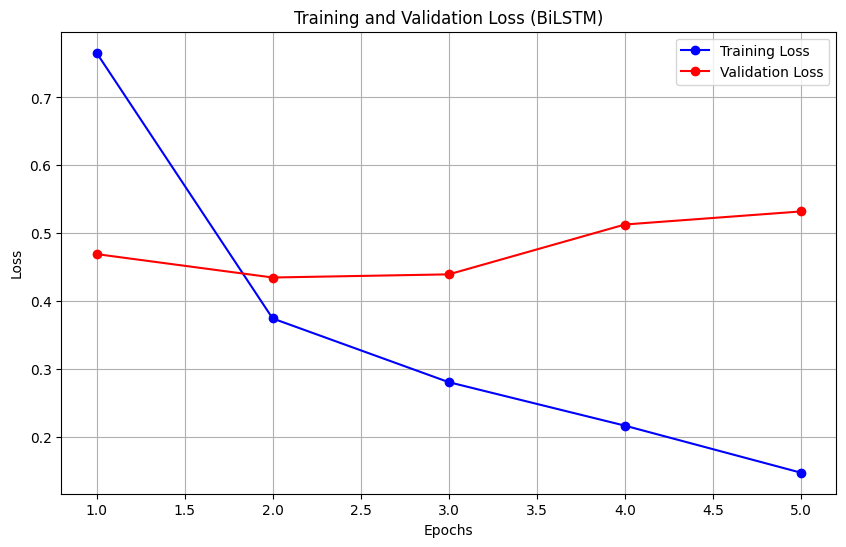

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8476 - loss: 0.4892
Test Accuracy: 84.91%


In [ ]:
# -*- coding: utf-8 -*-

import pandas as pd  # Data processing, CSV file
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Model
from keras.layers import Input, Embedding, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from sklearn.utils.class_weight import compute_class_weight

# Define the BiLSTM branch
def create_bilstm_branch(embedding_layer, lstm_units=256):  # Increased LSTM units
    lstm_layer = Bidirectional(LSTM(lstm_units, return_sequences=False))(embedding_layer)
    dropout = Dropout(0.5)(lstm_layer)  # Dropout for regularization
    return dropout

# Define the model
def create_model(max_sequence_length=100, vocab_size=20000, embedding_dim=100, lstm_units=256,
                 dense_units=100, num_classes=3):  # Increased LSTM and dense units
    # Input layer
    input_layer = Input(shape=(max_sequence_length,), dtype='int32')

    # Embedding layer
    embedding_layer = Embedding(input_dim=vocab_size, output_dim=embedding_dim)(input_layer)

    # LSTM branch
    bilstm_branch = create_bilstm_branch(embedding_layer, lstm_units=lstm_units)

    # Dense layer with L2 regularization
    dense_layer = Dense(dense_units, activation='relu', kernel_regularizer=l2(0.01))(bilstm_branch)

    # Output layer
    output_layer = Dense(num_classes, activation='softmax')(dense_layer)

    # Create the model
    model = Model(inputs=input_layer, outputs=output_layer)

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001),  # Increased learning rate
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Load datasets
df_train = pd.read_csv('/content/Corona_NLP_train.csv', encoding='latin')
df_test = pd.read_csv('/content/Corona_NLP_test.csv', encoding='latin')

# Preprocess the data
X_train = df_train['OriginalTweet']
y_train = df_train['Sentiment']

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

import re

# Clean text
def text_cleaner(tweet):
    # Remove URLs
    tweet = re.sub(r'http\S+', ' ', tweet)
    # Remove non-English characters
    tweet = re.sub(r'[^\x00-\x7F]+', ' ', tweet)
    # Remove HTML tags
    tweet = re.sub(r'<.*?>', ' ', tweet)
    # Remove digits
    tweet = re.sub(r'\d+', ' ', tweet)
    # Remove hashtags
    tweet = re.sub(r'#\w+', ' ', tweet)
    # Remove mentions
    tweet = re.sub(r'@\w+', ' ', tweet)
    # Convert to lowercase
    tweet = tweet.lower()
    # Remove stopwords
    tweet = tweet.split()
    tweet = " ".join([word for word in tweet if word not in stop_words])
    return tweet

stop_words = stopwords.words('english')

# Apply text cleaning
X_train = X_train.apply(text_cleaner)

# Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X = tokenizer.texts_to_sequences(X_train)
vocab_size = len(tokenizer.word_index) + 1

# Pad sequences
X = pad_sequences(X, padding='post')

# Map sentiments to numerical values
sentiments = {'Extremely Negative': 0,
              'Negative': 0,
              'Neutral': 1,
              'Positive': 2,
              'Extremely Positive': 2}
y_train = y_train.map(sentiments)

# Convert labels to categorical
y = to_categorical(y_train)

# Compute class weights for imbalanced data
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(enumerate(class_weights))

# Build the model
model = create_model(max_sequence_length=X.shape[1], vocab_size=vocab_size, embedding_dim=100,
                     lstm_units=256, dense_units=100, num_classes=3)

# Model summary
model.summary()

from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint('best_model_BiLTSM.h5',
                             monitor='val_loss',
                             save_best_only=True,
                             mode='min',
                             verbose=1)

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=1e-6, verbose=1)

# Train the model
history = model.fit(X, y,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2,
                    callbacks=[early_stopping, reduce_lr],
                    class_weight=class_weights)

# Plot training and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss (BiLSTM)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Preprocess test data
X_test = df_test['OriginalTweet'].copy()
y_test = df_test['Sentiment'].copy()

X_test = X_test.apply(text_cleaner)
X_test = tokenizer.texts_to_sequences(X_test)
X_test = pad_sequences(X_test, padding='post', maxlen=X.shape[1])

y_test = y_test.map(sentiments)
y_test = to_categorical(y_test)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')